# Machine Learning model to predict house price using linear regression

### Import Libraries 

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Load the California Housing Prices dataset


In [10]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

### Introduce missing values


In [11]:
missing_mask = np.random.rand(*X.shape) < 0.1
X[missing_mask] = np.nan

### Impute missing values and scale features


In [12]:
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)
X_preprocessed = pipeline.fit_transform(X)

In [13]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

### Create and Train the Model


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Make Predictions
y_pred = model.predict(X_test)

In [17]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.7160555515998746
Root Mean Squared Error: 0.84620065681839


In [18]:
# Predict New Data (Using a sample from the test set)
new_data = np.array([X_test[0]])  # Using the first sample from X_test
predicted_price = model.predict(new_data)
print(f"Predicted Price: {predicted_price[0]}")

Predicted Price: 0.9089328078787295


### Visualization


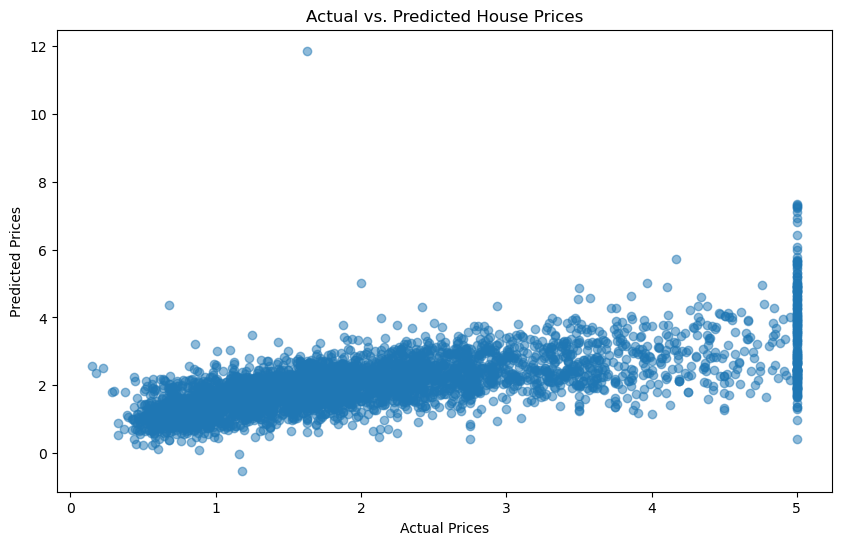

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()